In [1]:
import pandas, warnings

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [2]:
colors = ["#BC9F8B", "#B5CFB7", "#C5705D", "#ACE1AF", "#B3C8CF"]

def barplot(result, **barlimit):
  if "ylabel" not in barlimit.keys():
    barlimit["ylabel"] = "Total Trip"
  if "color" not in barlimit.keys():
    barlimit["color"] = colors
  bar = result.plot.bar(rot=0, **barlimit)
  for container in bar.containers:
    bar.bar_label(container, fmt="%1.1f")

def pieplot(result, **pieargs):
  if "colors" not in pieargs.keys():
    pieargs["colors"] = colors
  pieargs["ylabel"] = ""
  plot = result.plot.pie(**pieargs);

def lineplot(result, **lineargs):
  plot = result.plot.line(**lineargs)
  plot.set_xticks(result.index);

In [3]:
url = "okajakpril.csv"

origin = pandas.read_table(url, sep=",", parse_dates=["tap_in_time", "tap_out_time"])

origin.iloc[:5, :7]

,trans_id,pay_card_id,pay_card_bank,pay_card_name,pay_card_sex,pay_card_birth_date,corridor_id
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12


In [4]:
origin.iloc[:5, 7:14]

,corridor,direction,tap_in_stop,tap_in_stop_name,stop_start_seq,tap_in_time,tap_out_stop
0,Matraman Baru - Ancol,1.0,P00142,Pal Putih,7,2023-04-03 05:21:44,P00253
1,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,13,2023-04-03 05:42:44,B03307P
2,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,38,2023-04-03 05:59:06,B04962P
3,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,23,2023-04-03 05:44:51,B03090P
4,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,5,2023-04-03 06:17:35,P00098


In [5]:
origin.iloc[:5, 14:]

,tap_out_stop_name,stop_end_seq,tap_out_time,profit,in_day,selisih,in_hour
0,Tegalan,12.0,2023-04-03 06:00:53,3500,Monday,39,5
1,Sampoerna Strategic,21.0,2023-04-03 06:40:01,3500,Monday,57,5
2,Simpang Kunir Kemukus,39.0,2023-04-03 06:50:55,3500,Monday,51,5
3,Raya Penggilingan,29.0,2023-04-03 06:28:16,3500,Monday,43,5
4,Kali Besar Barat,15.0,2023-04-03 06:57:03,3500,Monday,39,6


In [6]:
origin.isnull().sum().sum()

0

In [7]:
origin.duplicated().sum()

0

`00`

In [8]:
origin["profit"].sum()

86359000

In [9]:
origin["profit"].count()

32595

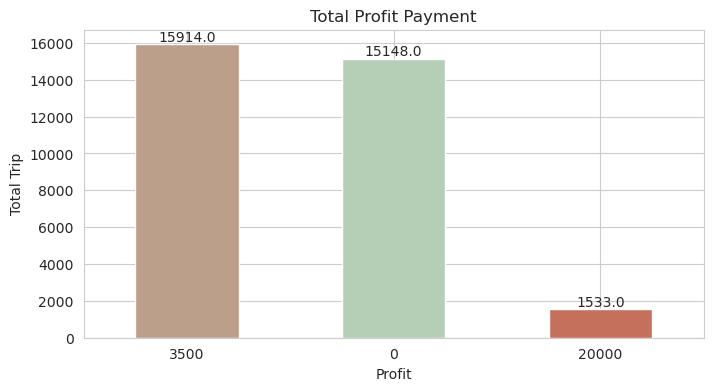

In [10]:
profit = origin["profit"].value_counts()

title = "Total Profit Payment"

barplot(profit, title=title, xlabel="Profit", figsize=(8, 4))

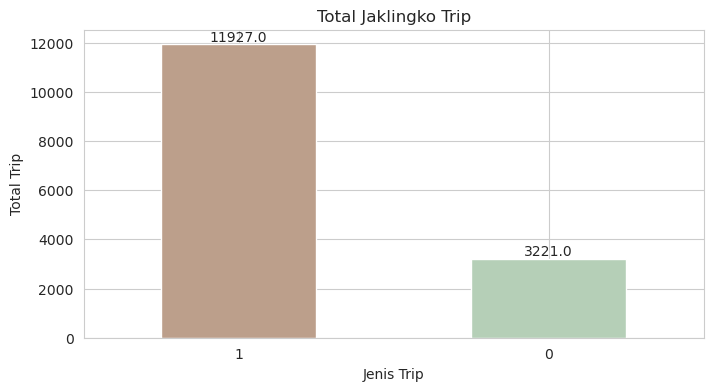

In [11]:
nul = origin[origin["profit"] == 0]

nul["jak"] = np.where(nul["corridor_id"].str.startswith("JAK"), 1, 0)

jakli = nul["jak"].value_counts()

title = "Total Jaklingko Trip"

barplot(jakli, title=title, xlabel="Jenis Trip", figsize=(8, 4))

`01`

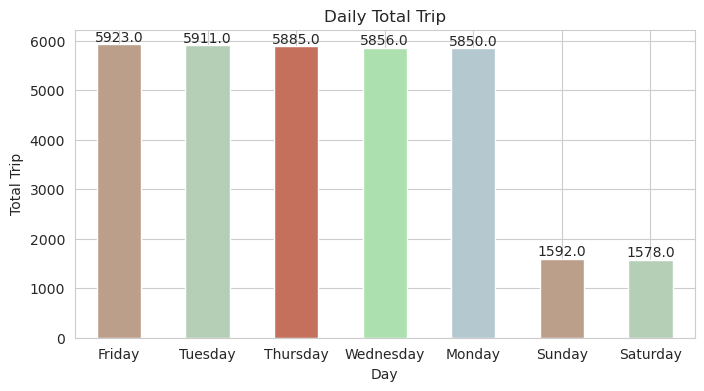

In [12]:
daily = origin.groupby("in_day")["profit"].count()

daily = daily.sort_values(ascending=False)

barplot(daily, title="Daily Total Trip", xlabel="Day", figsize=(8, 4))

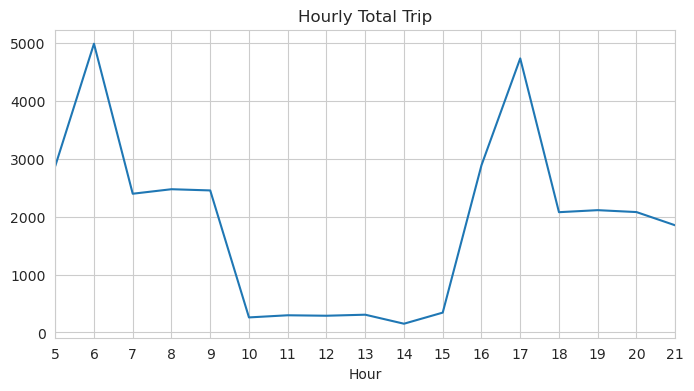

In [13]:
hourly = origin.groupby("in_hour")["profit"].count()

xlim = (hourly.index.min(), hourly.index.max())

lineplot(hourly, title="Hourly Total Trip", xlabel="Hour", figsize=(8, 4), xlim=xlim)

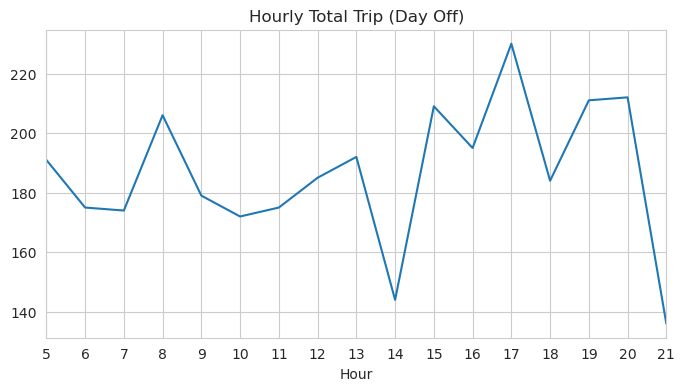

In [14]:
dayoff = origin[origin["in_day"].isin(["Sunday", "Saturday"])]

hourly = dayoff.groupby("in_hour")["profit"].count()

xlim = (hourly.index.min(), hourly.index.max())

lineplot(hourly, title="Hourly Total Trip (Day Off)", xlabel="Hour", figsize=(8, 4), xlim=xlim)

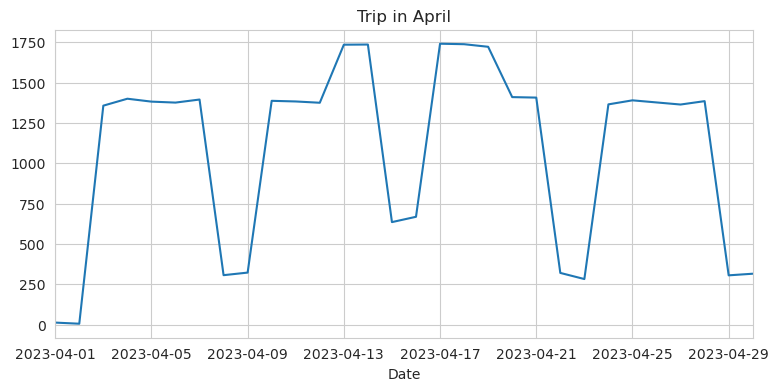

In [15]:
tang = origin.tap_in_time.dt.date

tanggal = origin.groupby(tang)["profit"].count()

tanggal.plot.line(title="Trip in April", xlabel="Date", figsize=(9, 4), xlim=(tang.min(), tang.max()));